Loading required package: ramify

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ramify'"
Loading required package: keras

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'keras'"


dplyr      readr      tidyr      purrr      broom   magrittr   corrplot 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     caret      rpart rpart.plot      e1071      torch        luz     ramify 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE      FALSE 
     keras 
     FALSE

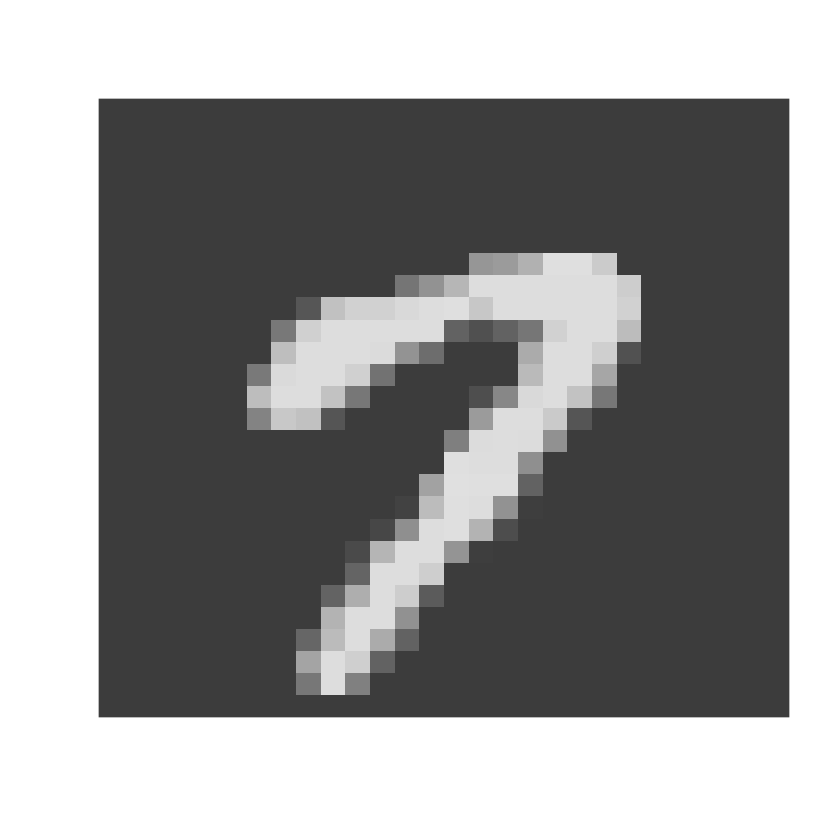

In [19]:
packages<- c(
"dplyr",
"readr",
"tidyr",
"purrr",
"broom",
"magrittr",
"corrplot",
"caret",
"rpart",
"rpart.plot",
"e1071",
"torch",
"luz",
"ramify",
"keras"
)
sapply(packages, require, character.only=T)
library(tidyverse)
data = read.csv("image_data.csv",header = F)
change = lapply(asplit(data, 1), matrix, nrow= 28)
image(change[[1]][,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )

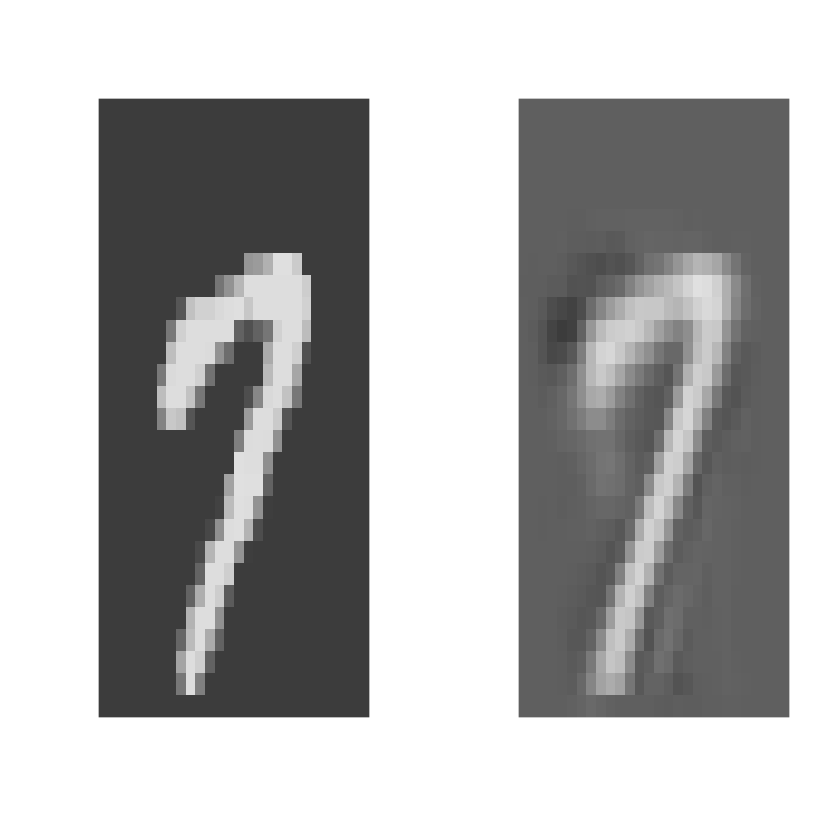

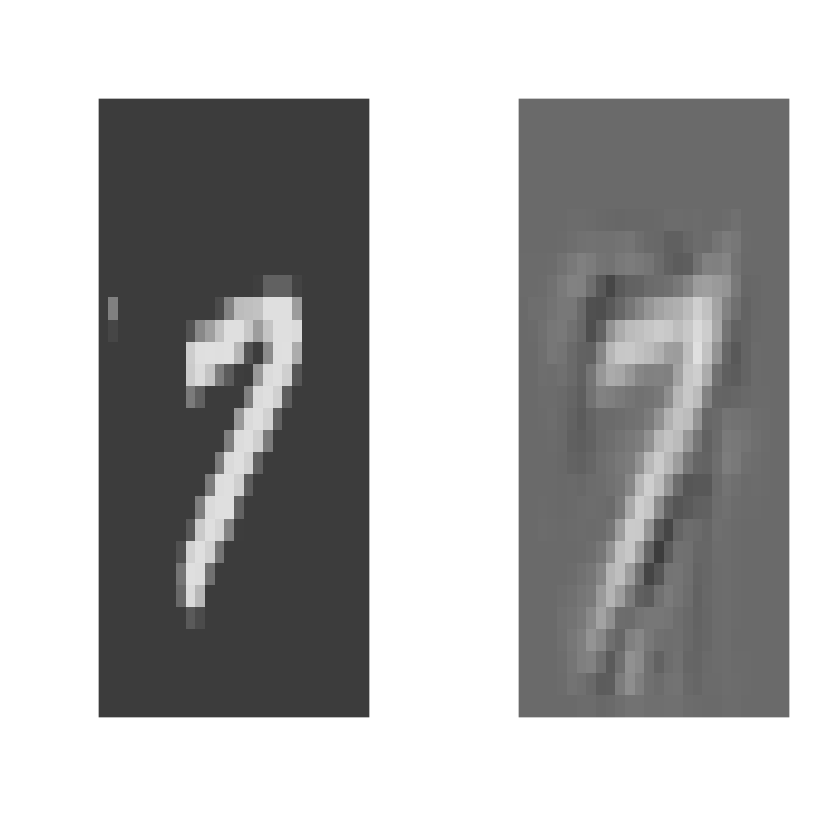

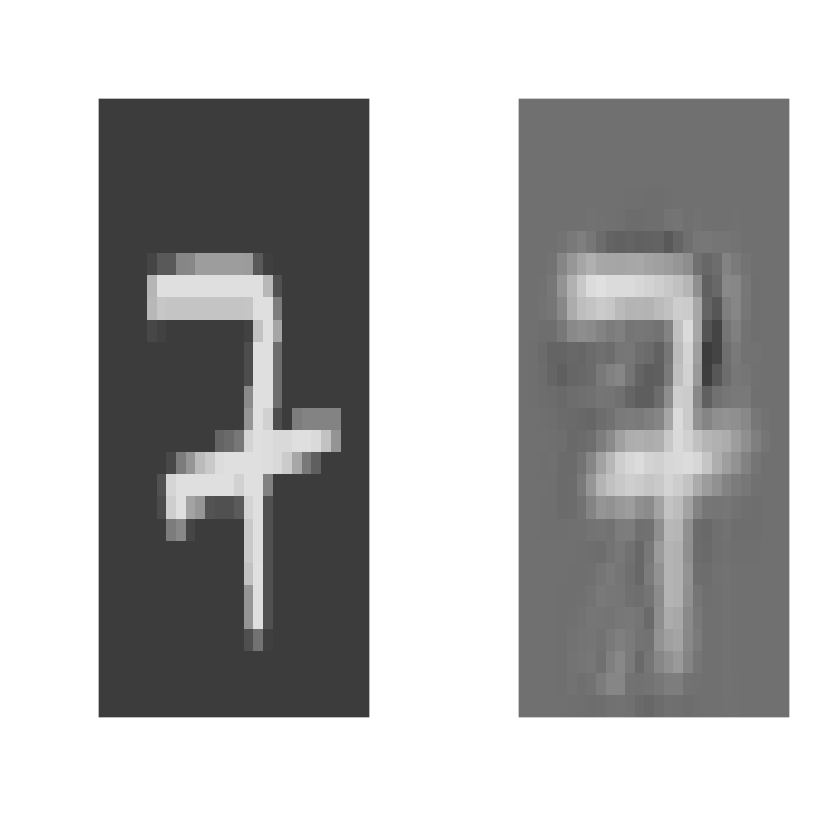

In [34]:
pca = prcomp(data)
mean784 = colMeans(data) 
evector25 = pca$rotation[,1:25]
dat1 = crossprod(as.matrix(data[1,]) %>% t, evector25)
score = pca$x
zjuj = crossprod(evector25 %>% t, score[, 1:25] %>% t) 
reconstruct = apply(zjuj,2,\(x) x+mean784) %>%  t
#zjuj[,1] + mean784 == reconstruct[,1]
for (i in 1:3){
  par(mfrow=c(1,2))
  image(change[[i]][,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
  image((reconstruct[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
}

In [21]:
plot_image = \(x) image(x[1:28,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000))
# image(change[[1]][,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )

# Autoencoder 

In [22]:
data = read.csv("image_data.csv",header = F) %>% data.frame 
dim(data)
a = unlist(data) 
dim(a) = c(400, 28, 28)
inputs = torch_tensor(a)


[1] 400 784

In [25]:

autoencoder <- nn_module(
  initialize = function(p, o) {
    self$encoder <- nn_sequential(
      nn_linear(p, o)
    )
    self$decoder <- nn_sequential(
      nn_linear(o, p)
    )
  },
  forward = function(x) {
    x %>%
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder() %>%
      self$decoder() %>% 
      torch_reshape(c(-1, 28, 28))
  },
  predict = function(x) {
    x %>% 
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder()     
  }
)

ae_fit <- autoencoder %>%
  setup(
    loss = nn_mse_loss(),
    optimizer = optim_adam
  ) %>%
  set_hparams(
    p=28*28, o=25
  ) %>%
  set_opt_hparams(
    lr=1e-3
  ) %>%
  fit(
    data = list(
      inputs, 
      inputs # targets are the same as inputs
    ),
    epochs=10,
    verbose=TRUE
    )

Epoch 1/10
Train metrics: Loss: 0.112
Epoch 2/10
Train metrics: Loss: 0.0937
Epoch 3/10
Train metrics: Loss: 0.0727
Epoch 4/10
Train metrics: Loss: 0.0554
Epoch 5/10
Train metrics: Loss: 0.0471
Epoch 6/10
Train metrics: Loss: 0.0434
Epoch 7/10
Train metrics: Loss: 0.041
Epoch 8/10
Train metrics: Loss: 0.0393
Epoch 9/10
Train metrics: Loss: 0.0375
Epoch 10/10
Train metrics: Loss: 0.0358


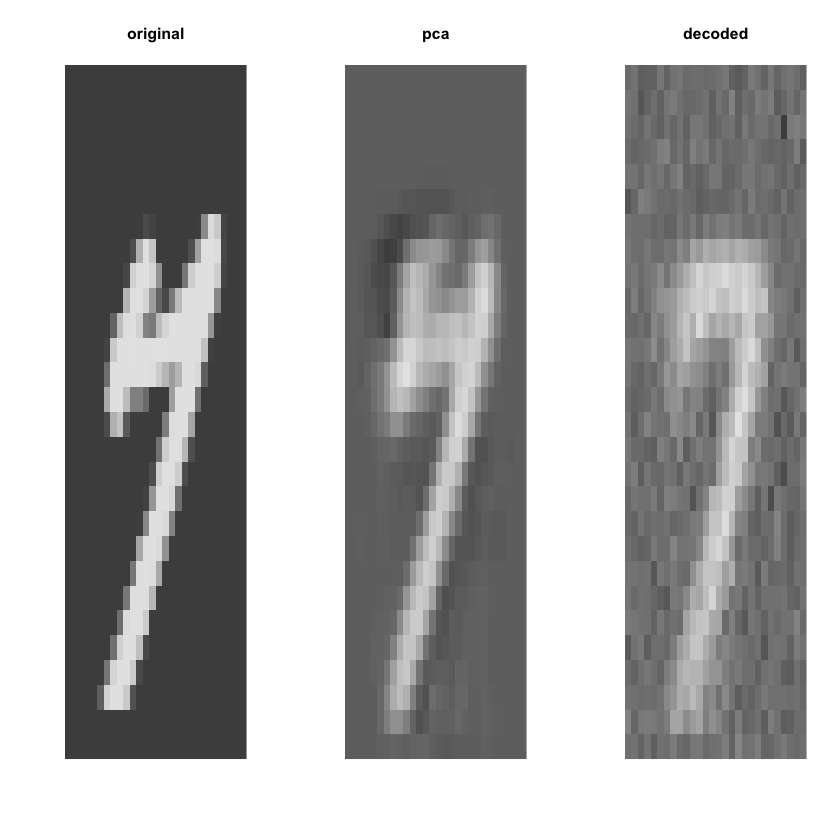

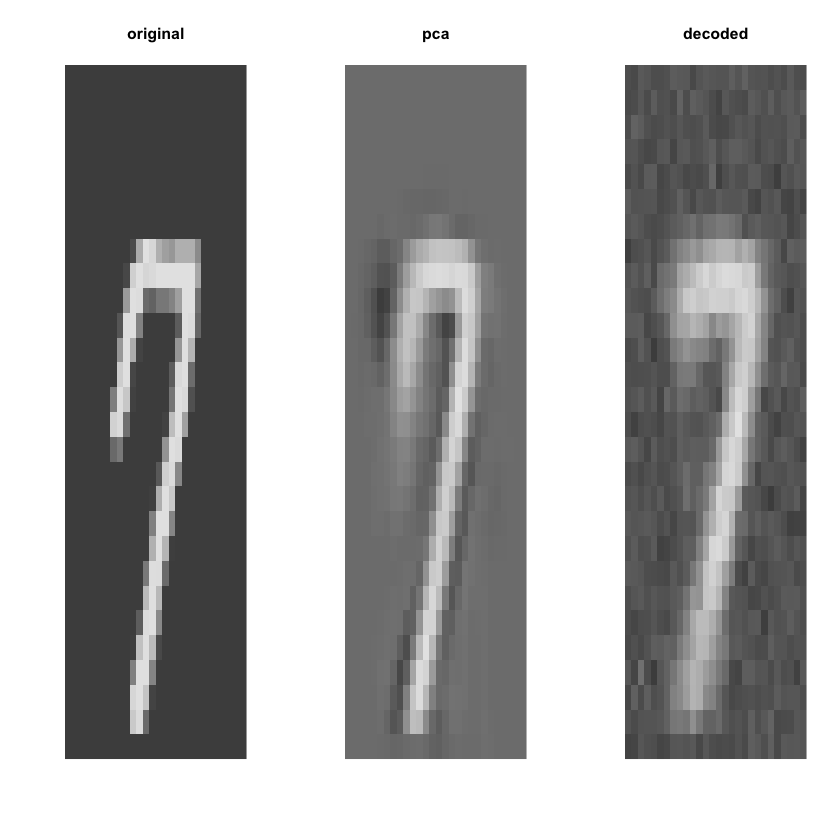

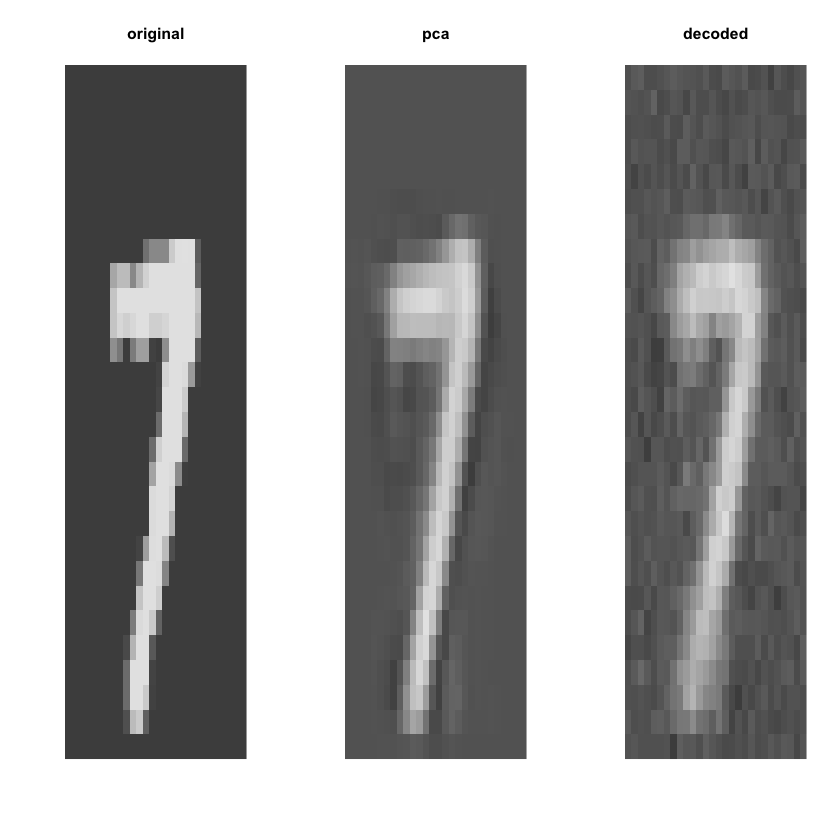

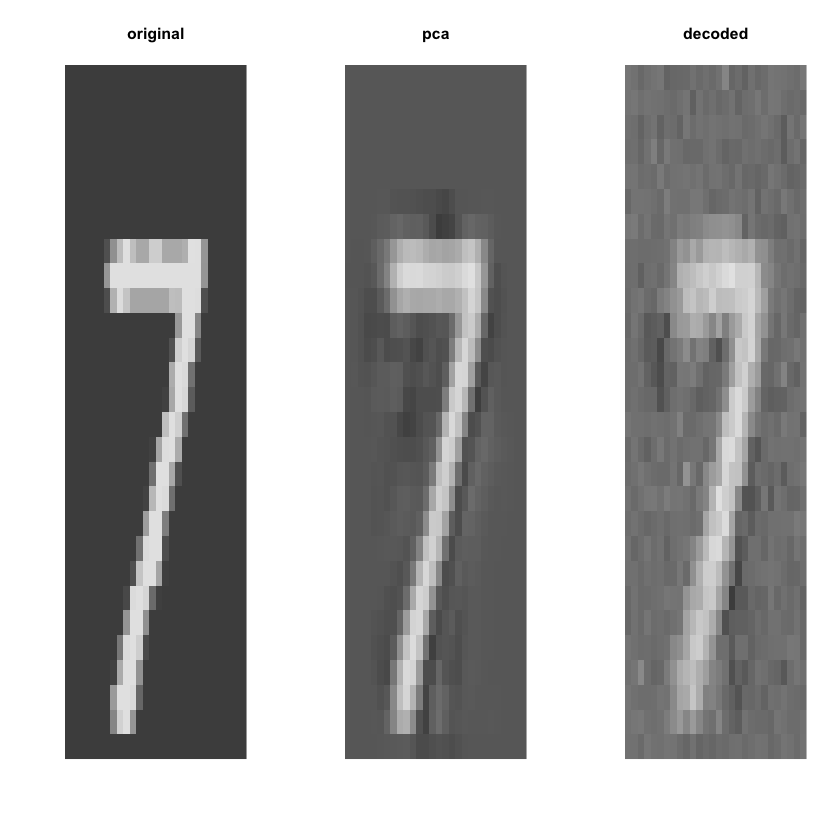

In [36]:

for (k in 1 : 4){
    par(mfrow=c(1,3))
    i <- sample(1:400, 1)
    input <- inputs[i]
    plot_image(input %>% as_array)
    title("original")

    image((reconstruct[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
    title("pca")

    output <- ae_fit$model$forward(inputs[i:i])[1]
    plot_image(output %>% as_array)
    title("decoded")
}




# nonlinear autoencoder

In [37]:

autoencoder2 <- nn_module(
  initialize = function(p, q1, o) {
    self$encoder <- nn_sequential(
      nn_linear(p, q1), nn_relu(), 
      nn_linear(q1, o)
    )
    self$decoder <- nn_sequential(
      nn_linear(o, q1), nn_relu(),
      nn_linear(q1, p)
    )
  },
  forward = function(x) {
    x %>%
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder() %>%
      self$decoder() %>% 
      torch_reshape(c(-1, 28, 28))
  },
  predict = function(x) {
    x %>% 
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder()     
  }
)

ae_fit2 <- autoencoder2 %>%
  setup(
    loss = nn_mse_loss(),
    optimizer = optim_adam
  ) %>%
  set_hparams(
    p=28*28, q1 = 64, o=25
  ) %>%
  set_opt_hparams(
    lr=1e-3
  ) %>%
  fit(
    data = list(
      inputs, 
      inputs # targets are the same as inputs
    ),
    epochs=10,
    verbose=TRUE
    )

Epoch 1/10
Train metrics: Loss: 0.0957
Epoch 2/10
Train metrics: Loss: 0.0669
Epoch 3/10
Train metrics: Loss: 0.0478
Epoch 4/10
Train metrics: Loss: 0.0424
Epoch 5/10
Train metrics: Loss: 0.039
Epoch 6/10
Train metrics: Loss: 0.0356
Epoch 7/10
Train metrics: Loss: 0.033
Epoch 8/10
Train metrics: Loss: 0.0304
Epoch 9/10
Train metrics: Loss: 0.0285
Epoch 10/10
Train metrics: Loss: 0.0269


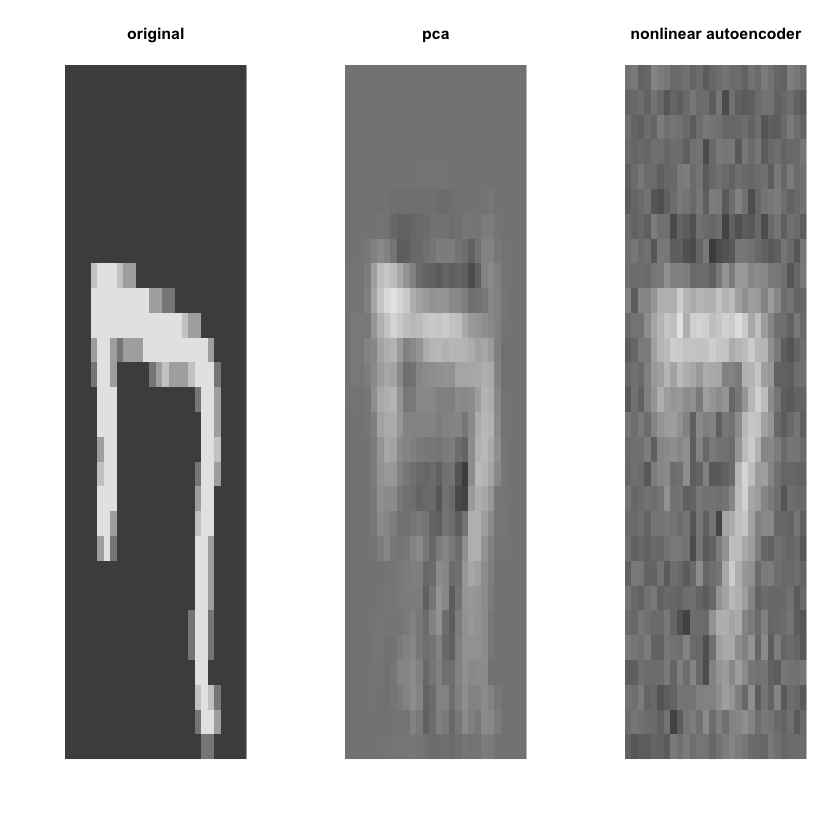

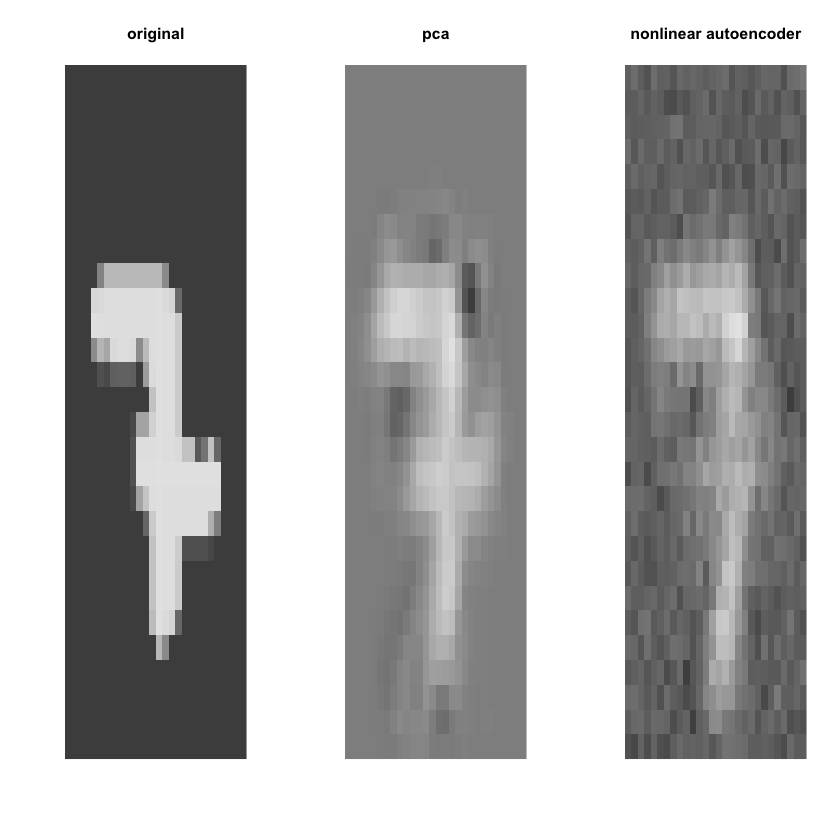

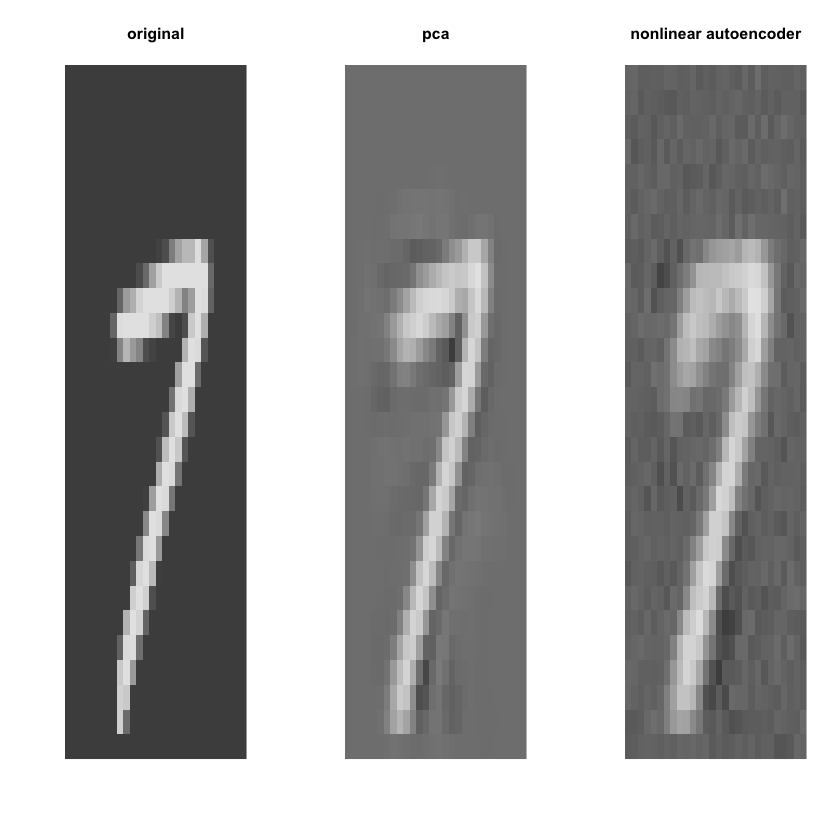

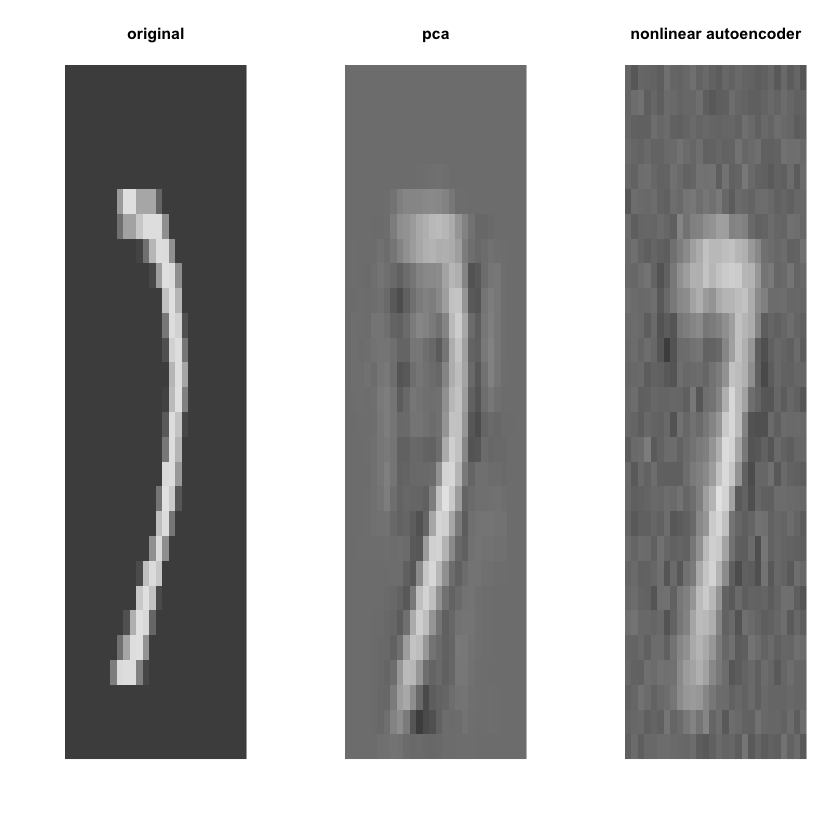

In [42]:
for (k in 1 : 4){
    par(mfrow=c(1,3))
    i <- sample(1:400, 1)
    input <- inputs[i]
    plot_image(input %>% as_array)
    title("original")

    image((reconstruct[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
    title("pca")

    # output <- ae_fit$model$forward(inputs[i:i])[1]
    # plot_image(output %>% as_array)
    # title("linear autoencoder")

    output2 <- ae_fit2$model$forward(inputs[i:i])[1]
    plot_image(output2 %>% as_array)
    title("nonlinear autoencoder")

}